In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Hakim Rajpoot\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df=pd.read_csv('churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# checking the percentage unique
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# checking the precentage unique

for col in df.columns :
    print("col_name : ", col," unique percentage : " , len(df[col].unique())/len(df))

col_name :  RowNumber  unique percentage :  1.0
col_name :  CustomerId  unique percentage :  1.0
col_name :  Surname  unique percentage :  0.2932
col_name :  CreditScore  unique percentage :  0.046
col_name :  Geography  unique percentage :  0.0003
col_name :  Gender  unique percentage :  0.0002
col_name :  Age  unique percentage :  0.007
col_name :  Tenure  unique percentage :  0.0011
col_name :  Balance  unique percentage :  0.6382
col_name :  NumOfProducts  unique percentage :  0.0004
col_name :  HasCrCard  unique percentage :  0.0002
col_name :  IsActiveMember  unique percentage :  0.0002
col_name :  EstimatedSalary  unique percentage :  0.9999
col_name :  Exited  unique percentage :  0.0002


In [6]:
# deleting RowNumber ,CustomerId and Surnamke
df=df.drop(["RowNumber","CustomerId","Surname"],axis = 1)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
# Label encode the Object Datatypes
from sklearn.preprocessing import LabelEncoder

d_types = dict(df.dtypes) 

for name , type in d_types.items():
    if str(type) == 'object':
        Le = LabelEncoder()
        df[name] = Le.fit_transform(df[name])


In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# one hot encode geograbhy
# optional

from sklearn.preprocessing import OneHotEncoder

onehotencoder =OneHotEncoder()
encodings = onehotencoder.fit_transform(df['Geography'].values.reshape(-1,1)).toarray()

# values = dic(df['Geography'].values_counts())
values =df["Geography"].unique()

for val in values:
    df["Geography_"+ str(val)] = encodings[:,val]
    
df = df.drop(["Geography"] , axis = 1)

df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_2,Geography_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [12]:
remaining_columns = list(df.columns)
remaining_columns.remove("Exited")

In [13]:
remaining_columns 

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_0',
 'Geography_2',
 'Geography_1']

In [14]:
# Feature and Target vector

X =df[remaining_columns].values
Y =df['Exited'].values.astype(np.uint8)

In [15]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest =train_test_split(X,Y,test_size=0.2,random_state =4)

In [16]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain =Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtrain)

C:\Users\Hakim Rajpoot\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Hakim Rajpoot\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


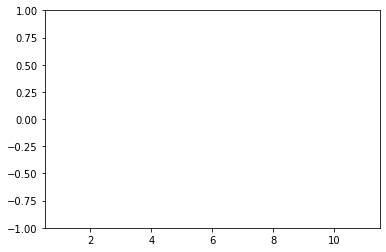

In [20]:
# check whether data is standardized or not
# mean should be 
plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[: i]))
    
plt.plot(means ,scaley =False)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(Xtrain ,Ytrain)
model.score(xtest,Ytest)

NameError: name 'xtest' is not defined

In [24]:
model.coef_

array([[-0.03444651, -0.25435422,  0.75093096, -0.05445845,  0.20181171,
        -0.06473687, -0.04270295, -0.53682421,  0.03456902, -0.11088871,
        -0.08503169,  0.21209781]])

In [26]:
model.intercept_

array([-1.63966082])

In [27]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
    

In [28]:
# Sigmoid(w.dot(x))

sigmoid(model.coef_.dot(Xtest[10,:]+model.intercept_))

array([0.40679697])

In [29]:
np.round(sigmoid(model.coef_.dot(Xtest[10,:]) + model.intercept_))

array([0.])

In [30]:
model.predict(Xtest[10,:].reshape(1,-1))

array([0], dtype=uint8)